In [24]:
import pandas as pd
import string
import re
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pickle
import os
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import cv2
import pytesseract as tess
tess.pytesseract.tesseract_cmd=r'C:\Program Files\Tesseract-OCR\tesseract.exe'


In [2]:
data=pd.set_option('display.max_colwidth',100)
data=pd.read_csv('Language Detection_1.csv', encoding='utf-8')
data

,Text,Language
0,"Nature, in the broadest sense, is the natural, physical, material world or universe.",English
1,"""Nature"" can refer to the phenomena of the physical world, and also to life in general.",English
2,"The study of nature is a large, if not the only, part of science.",English
3,"Although humans are part of nature, human activity is often understood as a separate category fr...",English
4,[1] The word nature is borrowed from the Old French nature and is derived from the Latin word na...,English
...,...,...
7502,"Vừa rồi mẹ có đăng ký thêm một khoá học tiếng Anh để con theo học ở Trung tâm, mong sẽ cải thiện...",TV
7503,Cô giáo bảo ngoại ngữ rất quan trọng trong tương lai nên phải chú ý học chắc ngày từ bây giờ đó bố.,TV
7504,Những lúc rảnh còn đều mở nhạc nước ngoài nghe hay xem phim hoạt hình song ngữ để nâng cao khả n...,TV
7505,"Cuối tuần, khi chị Nhi con Bác Sơn sang chơi, con đều nhờ chị ấy bày giúp con bí quyết học tiếng...",TV


In [3]:
x=data['Text'].astype(str)
y=data['Language'].astype(str)
print(x.tail(3))
print(y.tail(3))

7504    Những lúc rảnh còn đều mở nhạc nước ngoài nghe hay xem phim hoạt hình song ngữ để nâng cao khả n...
7505    Cuối tuần, khi chị Nhi con Bác Sơn sang chơi, con đều nhờ chị ấy bày giúp con bí quyết học tiếng...
7506    và cả tập trao đổi những chủ đề đơn giản như bữa ăn hàng ngày, môn học yêu thích,...nữa đấy bố. ...
Name: Text, dtype: object
7504    TV
7505    TV
7506    TV
Name: Language, dtype: object


In [4]:
x_lower=x.str.lower() # bien tat ca chu in hoa thanh chu thuong
x_lower

0                      nature, in the broadest sense, is the natural, physical, material world or universe.
1                   "nature" can refer to the phenomena of the physical world, and also to life in general.
2                                         the study of nature is a large, if not the only, part of science.
3       although humans are part of nature, human activity is often understood as a separate category fr...
4       [1] the word nature is borrowed from the old french nature and is derived from the latin word na...
                                                       ...                                                 
7502    vừa rồi mẹ có đăng ký thêm một khoá học tiếng anh để con theo học ở trung tâm, mong sẽ cải thiện...
7503    cô giáo bảo ngoại ngữ rất quan trọng trong tương lai nên phải chú ý học chắc ngày từ bây giờ đó bố.
7504    những lúc rảnh còn đều mở nhạc nước ngoài nghe hay xem phim hoạt hình song ngữ để nâng cao khả n...
7505    cuối tuần, khi chị n

In [5]:
remove_daucau=string.punctuation
print(remove_daucau)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [6]:
# remove !"#$%&\'()*+,-./:;<=>?@[\\]^_{|}~`
# loại bỏ các kí tự đặc biệt ra khỏi văn bản giúp văn bản dễ nhận diện hơn
def remove_punctuation(text):
    return text.translate(str.maketrans('', '',remove_daucau))


In [7]:
remove_punctuation( "ngày $%^^&% đẹp @$ trời ~!@")

'ngày  đẹp  trời '

In [8]:

x_l_remove= x_lower.apply(lambda text: remove_punctuation(text))

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x_l_remove,y,test_size=0.1,random_state=1)
print("Dữ liệu huấn luyện",x_train.shape)
print("Dữ liệu kiểm chứng",x_test.shape)
print("Nhãn dữ liệu huấn luyện",y_train.shape)
print("Nhãn dữ liệu kiểm chứng",y_test.shape)

Dữ liệu huấn luyện (6756,)
Dữ liệu kiểm chứng (751,)
Nhãn dữ liệu huấn luyện (6756,)
Nhãn dữ liệu kiểm chứng (751,)


In [10]:
vectorizer = TfidfVectorizer(ngram_range=(1,3), analyzer='char') 

In [11]:
# Create a pipeline that vectorizer, then runs logistic regression
logit = LogisticRegression()
model = make_pipeline(vectorizer, logit)

In [12]:
model_n=model.fit(x_train,y_train)

In [13]:
with open ('model_pickle','wb') as f:
    pickle.dump(model_n,f)

In [14]:
import pickle
with open ('model_pickle','rb') as f:
    mp=pickle.load(f)

In [15]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy is :",accuracy)

Accuracy is : 0.9853528628495339


In [16]:
def dudoan(text):
    predict = model.predict([text])
    if predict=="TV":
        print("Ngôn ngữ là tiếng việt")
    else:
        print("Ngôn ngữ không là tiếng việt")

In [17]:
dudoan("hello everybody") # tiếng anh
dudoan("what a nice day")
dudoan("draft session")
dudoan("dispositivo mobile") 
dudoan("xin chào")# tiếng việt
dudoan("nguyễn nhật tiến")
dudoan("bài tập về nha")


Ngôn ngữ không là tiếng việt
Ngôn ngữ không là tiếng việt
Ngôn ngữ không là tiếng việt
Ngôn ngữ không là tiếng việt
Ngôn ngữ là tiếng việt
Ngôn ngữ là tiếng việt
Ngôn ngữ là tiếng việt


In [18]:

while 1:
    text_input=input("nhập văn bản:") # dự đoán
    if text_input=="q":
        print('')
        break
    else:
        text_predict= model.predict([text_input])
        A=text_input
        B=text_predict
        print('Văn bản đã nhập:',text_input)
        print('Ngôn ngữ là:',text_predict[0])
        if B!="TV":
           print("Ngôn Ngữ không phải là tiếng việt")

In [19]:
Image.open('Untitled.png')

NameError: name 'Image' is not defined

In [ ]:

imgg= Image.open('Untitled.png')
text_tran=tess.image_to_string(imgg, lang="vie")
text_predict= model.predict([text_tran])
print('Ngôn ngữ nhận dạng là:',text_predict[0])

Ngôn ngữ nhận dạng là: TV


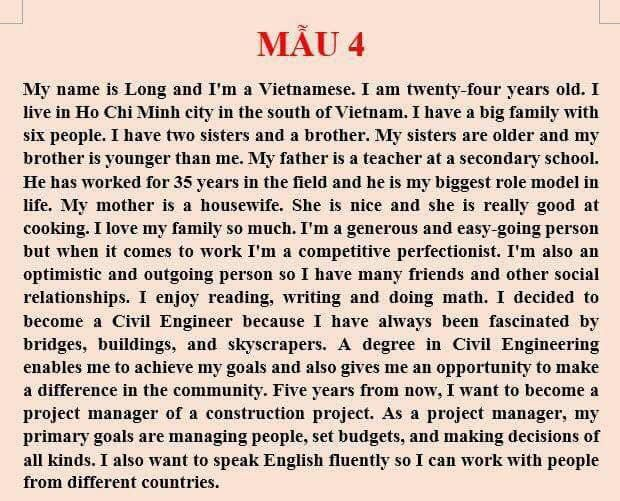

In [ ]:
Image.open('9955448a9b814f28b0a9b25b6953a576.jpg')

In [ ]:
imgg= Image.open('9955448a9b814f28b0a9b25b6953a576.jpg')
text_tran=tess.image_to_string(imgg, lang="vie")
text_predict= model.predict([text_tran])
print('Ngôn ngữ nhận dạng là:',text_predict[0])


Ngôn ngữ nhận dạng là: English


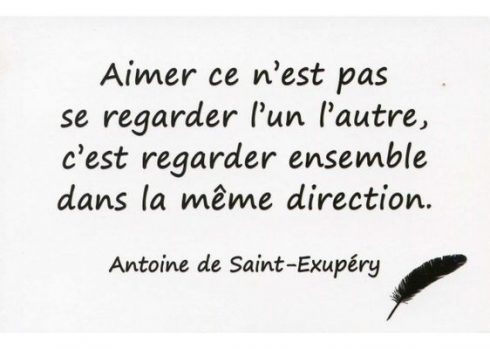

In [ ]:
Image.open('phap (2).jpg')

In [ ]:

imgg= Image.open('phap (2).jpg')
text_tran=tess.image_to_string(imgg)
text_predict= model.predict([text_tran])
print('Ngôn ngữ nhận dạng là:',text_predict[0])


Ngôn ngữ nhận dạng là: French


In [50]:
img=cv2.imread('van_ban\NTV\Sample-Experimental-Sentences-in-English-and-French.png')
text_tran=tess.image_to_string(img, lang='vie')
text_predict= model.predict([text_tran])
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
boxes=tess.image_to_data(img)
for a,b in enumerate(boxes.splitlines()):
    if a!=0:
        b=b.split()
        if len(b)==12:
            x,y,w,h= int(b[6]),int(b[7]),int(b[8]),int(b[9])            
            cv2.putText(img,'predict:',(10,30),cv2.FONT_HERSHEY_PLAIN,1,(50,50,255),2) 
            cv2.putText(img,text_predict[0],(80,30),cv2.FONT_HERSHEY_PLAIN,1,(50,50,255),2)  
cv2.imshow("Ai",img)
cv2.waitKey()
cv2.destroyAllWindows()

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 7-8: malformed \N character escape (3786290591.py, line 1)

In [51]:
img=cv2.imread('van_ban/NTV/CBSE Class 10 English Communicative Question Paper Solved 2019 Set A_0.png')
text_tran=tess.image_to_string(img, lang='vie')
text_predict= model.predict([text_tran])
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
boxes=tess.image_to_data(img)
for a,b in enumerate(boxes.splitlines()):
    if a!=0:
        b=b.split()
        if len(b)==12:
            x,y,w,h= int(b[6]),int(b[7]),int(b[8]),int(b[9])           
            cv2.putText(img,'predict :',(1,30),cv2.FONT_HERSHEY_PLAIN,1,(50,50,255),2) 
            cv2.putText(img,"NTV",(80,30),cv2.FONT_HERSHEY_PLAIN,1,(50,50,255),2) 
cv2.imshow("Ai",img)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
img=cv2.imread('Me_with_text.png')
text_tran=tess.image_to_string(img, lang='vie')
text_predict= model.predict([text_tran])
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
boxes=tess.image_to_data(img)
for a,b in enumerate(boxes.splitlines()):
    if a!=0:
        b=b.split()
        if len(b)==12:
            x,y,w,h= int(b[6]),int(b[7]),int(b[8]),int(b[9])            
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
            cv2.putText(img,b[11],(x,y),cv2.FONT_HERSHEY_PLAIN,1,(50,50,255),1)
            cv2.putText(img,'predict:',(10,30),cv2.FONT_HERSHEY_PLAIN,1,(50,50,255),2) 
            cv2.putText(img,text_predict[0],(80,30),cv2.FONT_HERSHEY_PLAIN,1,(50,50,255),2) 
cv2.imshow("Ai",img)
cv2.waitKey()
cv2.destroyAllWindows()